### What is Unemployment Analysis?
##### Unemployment analysis means studying how many people in the workforce don’t have jobs and what patterns exist.

### Key Concepts You Should Know
#### Unemployment Rate (%)
### Unemployment Rate = Unemployed People/Labour Force * 100
###### Labour Force = Employed + Unemployed (people actively seeking work).

######Labour Participation Rate (LPR) = % of working-age population in the labour force.

### LBP = Labour Force/ Working Age Population * 100

In [1]:
# Import Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/MArifBrohi/Unemplyment_Analysis/refs/heads/main/Unemployment%20in%20India.csv'
df = pd.read_csv(url)

### Preview Data


In [3]:
# Dataset First Look
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Step Dataset Rows and Columns

In [4]:
# Number of Rows
print("Number of Rows:", df.shape[0])
# Number of Cols
print('Number of Col:', df.shape[1])





Number of Rows: 768
Number of Col: 7


### Dataset Information

In [5]:
# Checking information of dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### Duplicate Values

In [6]:
# Duplicate Values Count
dup = df.duplicated().sum()
print(f'Number of Duplicated Values {dup}')

Number of Duplicated Values 27


### Missing values/Null Values

In [7]:
# Number of Null of values
null=df.isnull().sum()
print(null)

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


##### There is a horizontal white band around row index 360–390 → these rows have missing values across all columns.

<Axes: >

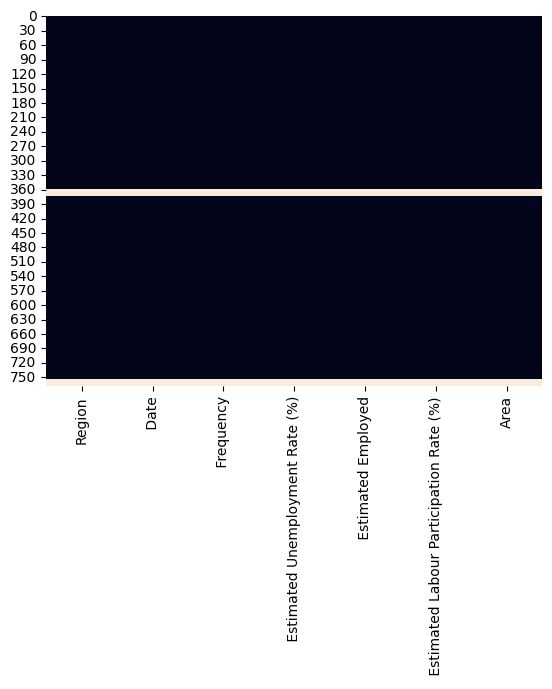

In [8]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### Understanding the variables

In [9]:
# Dataset Columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
# Descriptive statistics (mean, min, max, etc.)
df.describe(include="all").round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


In [11]:
for i in df.columns.tolist():
  print(f'No. of unique values in {i}: {df[i].nunique()}')

No. of unique values in Region: 28
No. of unique values in  Date: 14
No. of unique values in  Frequency: 2
No. of unique values in  Estimated Unemployment Rate (%): 624
No. of unique values in  Estimated Employed: 740
No. of unique values in  Estimated Labour Participation Rate (%): 626
No. of unique values in Area: 2



### What “categorical” means in pandas?
##### A categorical column is stored as: a small lookup table of unique labels called categories (e.g., ['Rural','Urban']), and an integer array of codes (e.g., [1, 0, 1, 1, 0, ...]) pointing to those labels. Missing values are stored with code -1.

## Data Wrangling Code

In [15]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']


In [16]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [17]:
# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')

In [18]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [19]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0,9.0


In [20]:
# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)

In [21]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0


In [22]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()

In [23]:
# Drop all the missing values from 'df' dataset
df=df.dropna()

In [24]:
# Checing again Number of Null of values
null=df.isnull().sum()
print(null)

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
Month_int                              0
dtype: int64


## 1. Before Lockdown Data

In [25]:
# Keeps only data from May 2019 → March 2020.
# That’s the period before lockdown in India.
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')
df = df.loc[mask]


## 2. During Lockdown Data

In [27]:
# Keeps only data from April 2020 onward (when COVID lockdown effects started).
# That’s the during/post lockdown dataset.
mask = (df_ld['Date'] >= '2020-04-30')
df_ld = df_ld.loc[mask]


## What all manipulations have you done and insights you found?
- Rename the columns name of the DataFrame.
- Convert Frequency and Region to categorical data type.
- Convert the 'Date' column to datetime format, extract month from the 'Date' column and create a new 'Month_int' column by converting the 'Month' column to integers.
- Drop the 'Month' column from the DataFrame.
- Create a copy of the dataset for the data of during lockdown period.
- Drop all the missing values from before lockdown dataset.
- Take the range of date from 2019-05-31 to 2020-03-31 as before lockdown period and date after 2020-04-30 as during lockdown period.

### Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Chart - 1 : Region Wise Estimated Unemployment Rate

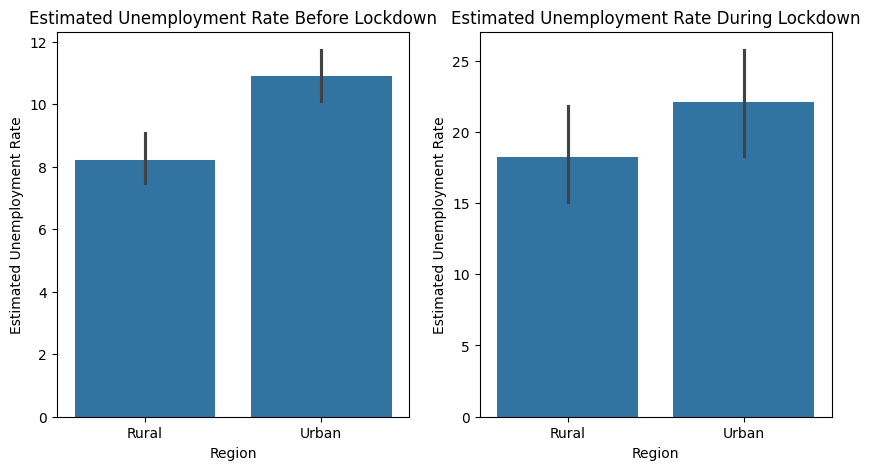

In [43]:
# 1. Create the figure with 2 subplots
plt.figure(figsize = (10, 5))
# 2. First subplot → Before Lockdown
plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)
# 3. Add labels + title
plt.xlabel("Region", fontsize=10)
plt.ylabel("Estimated Unemployment Rate", fontsize=10)
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=12)

# 4. Second subplot → During Lockdown
plt.subplot(1,2,2)
sns.barplot(x = 'Region', y = 'Estimated Unemployment Rate', data = df_ld)
# 5. Add labels + title
plt.xlabel("Region", fontsize=10)
plt.ylabel("Estimated Unemployment Rate", fontsize=10)
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=12)
plt.show()

### Chart - 2 : Swarm Plot for State Wise Estimated Unemployment Rate

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 54.5% of the points cannot be plac

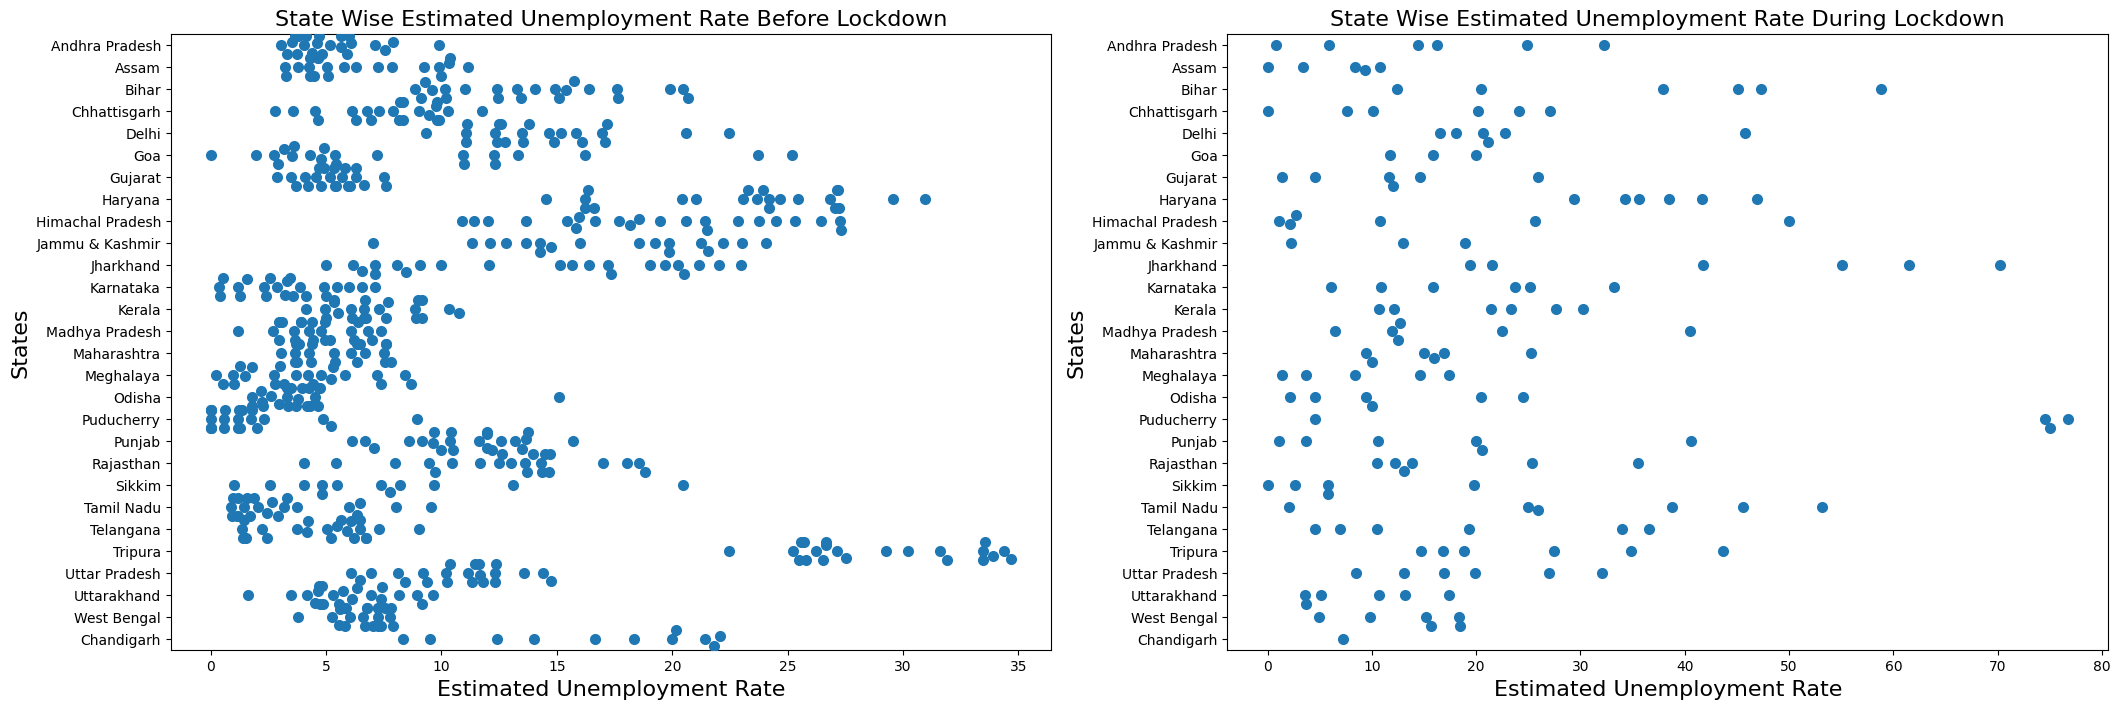

In [45]:

# Chart - 2 Swarm plot visualization code for State Wise Estimated Unemployment Rate before and during lockdown.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8)

# Set labels for the first subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8)

# Set labels for the second subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()

### Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate

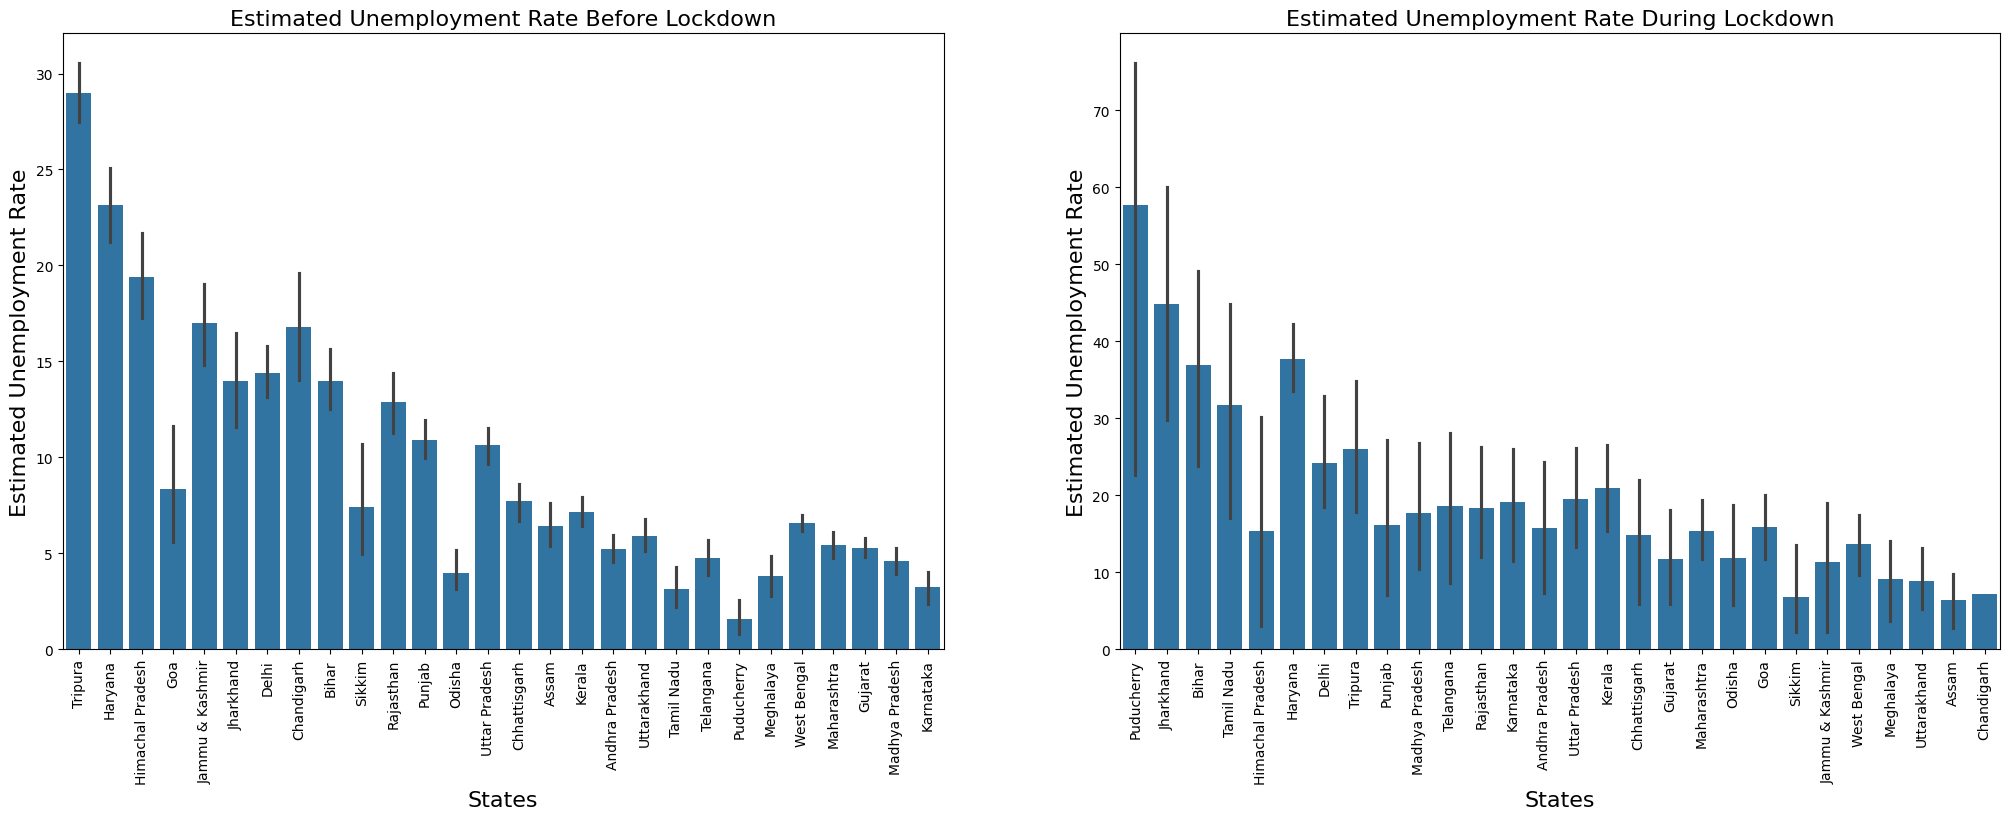

In [46]:
# Chart - 3 Bar for visualization code for State wise Estimated Unemployment Rate before and during lockdown time.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

Chart - 4 : State Wise Estimated Employed Workforce

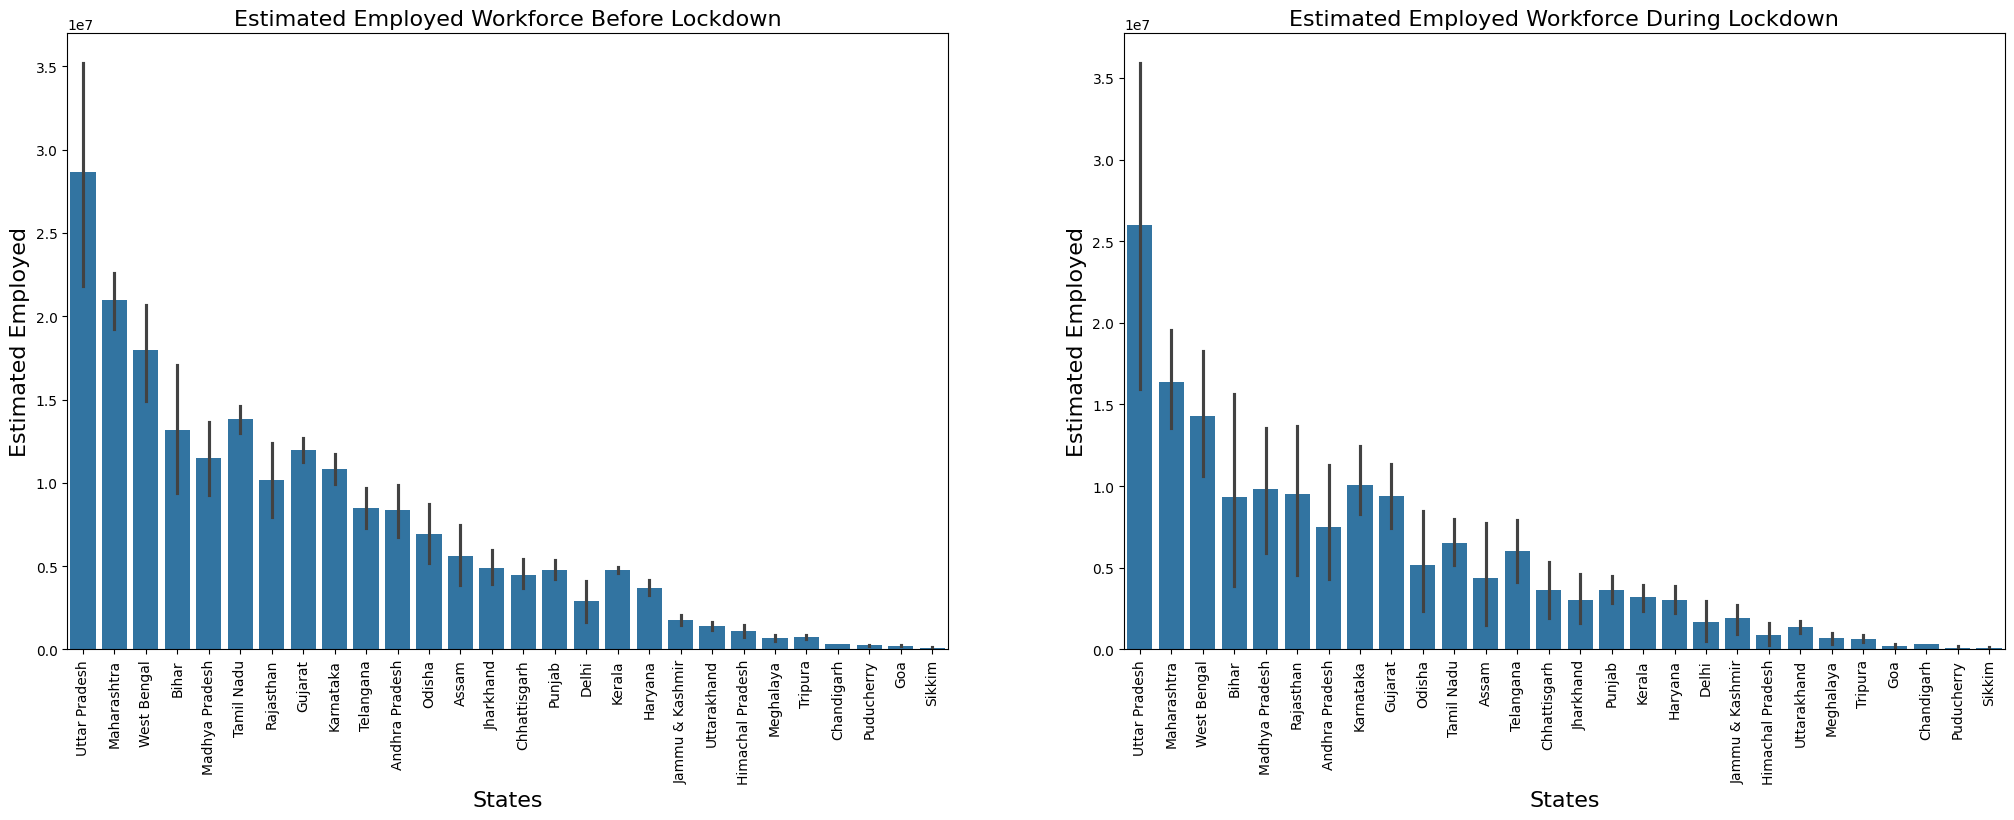

In [48]:
# Chart - 4 Bar plot visualization code for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()

### Chart - 5 : State Wise Estimated Labour Participation Rate

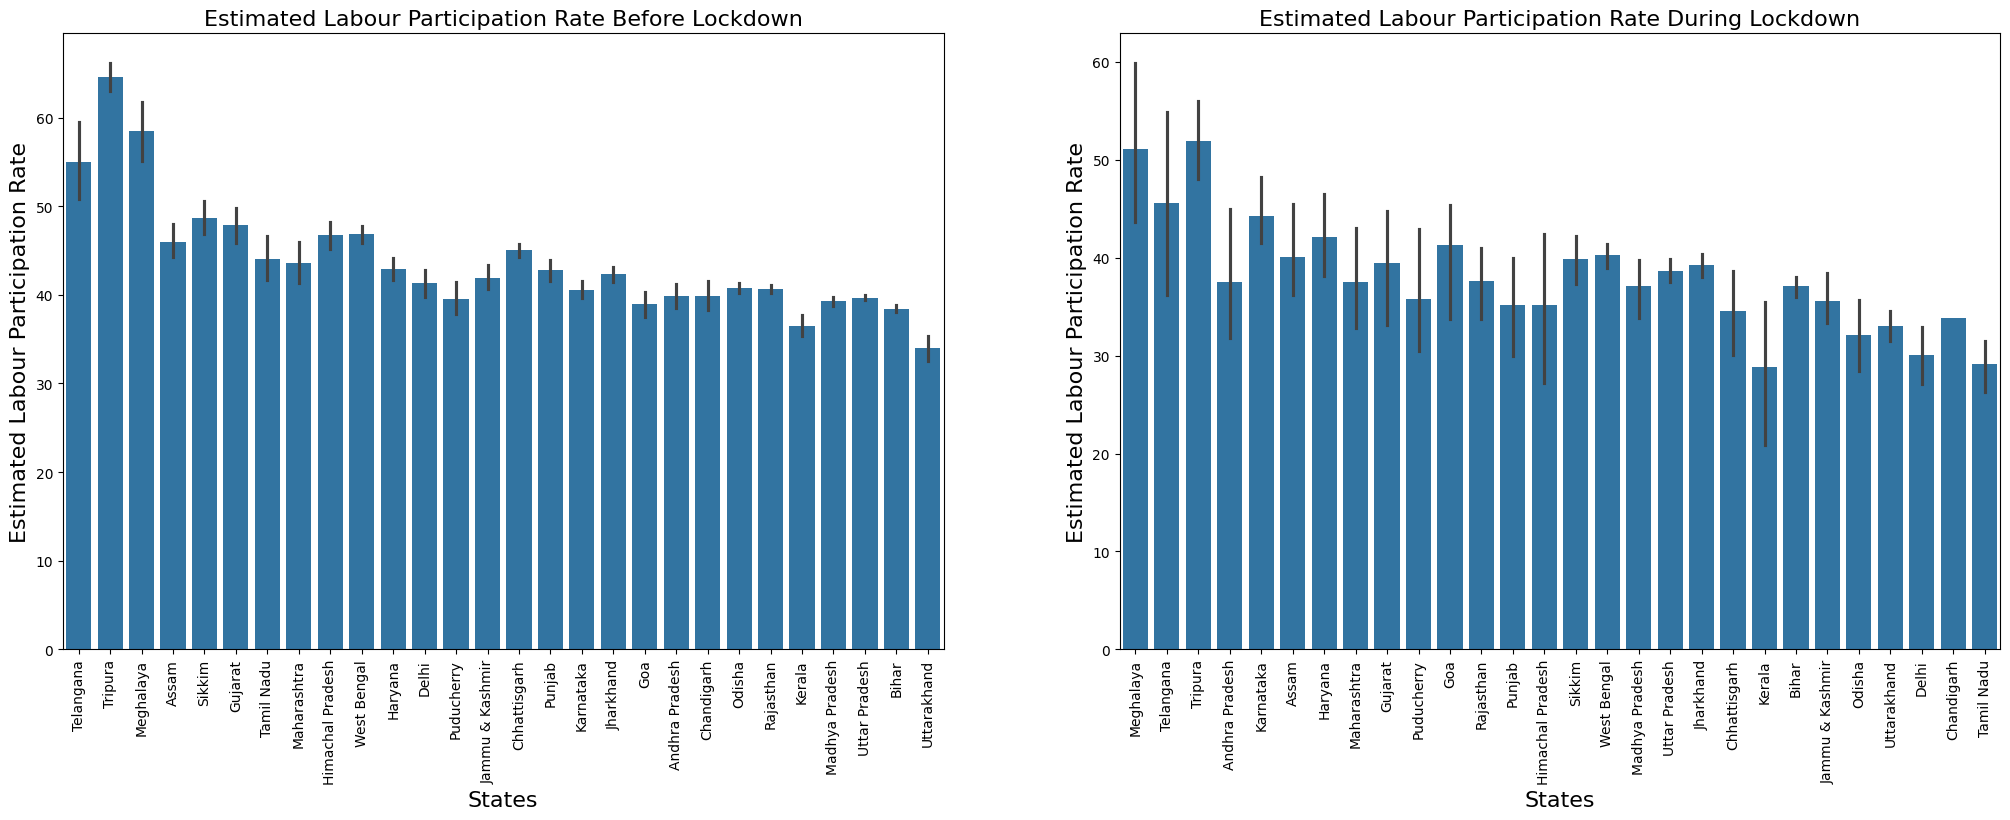

In [49]:
# Chart - 5 Bar plot visualization code for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

### Chart - 6 : Correlation Heatmap

In [50]:
# Create new DataFrames
df1_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]


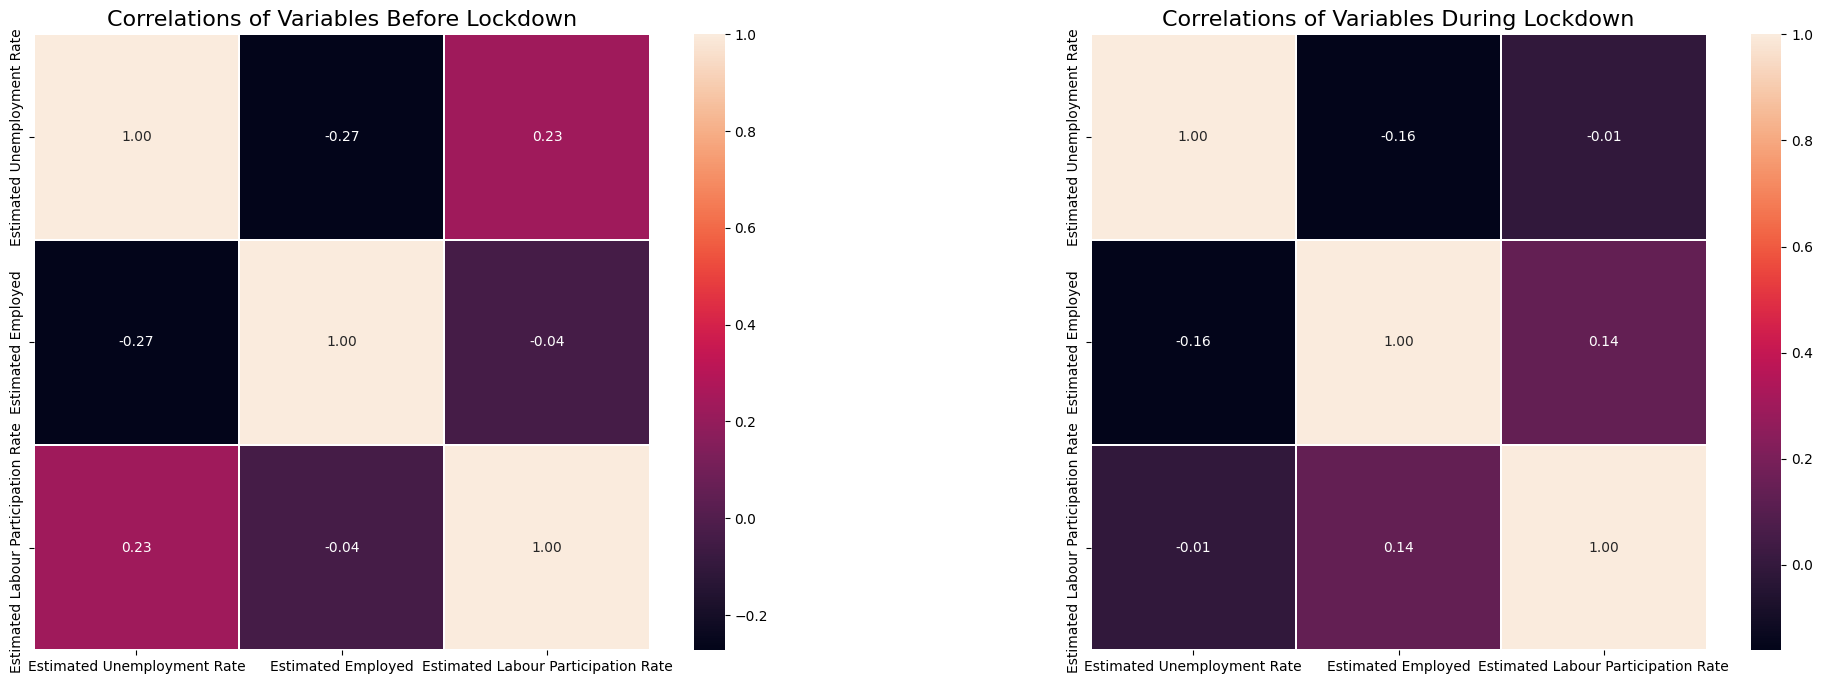

In [51]:
# Chart - 6 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()